In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('country_vaccinations.csv')
#print(df.info())
print(df.head())

       country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                 

In [4]:
# Choose selected countries
countries = ['India', 'United States', 'Brazil', 'Germany', 'South Africa']
df_filtered = df[df['country'].isin(countries)]

In [6]:
#Convert Dates
df_filtered = df_filtered.copy()
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

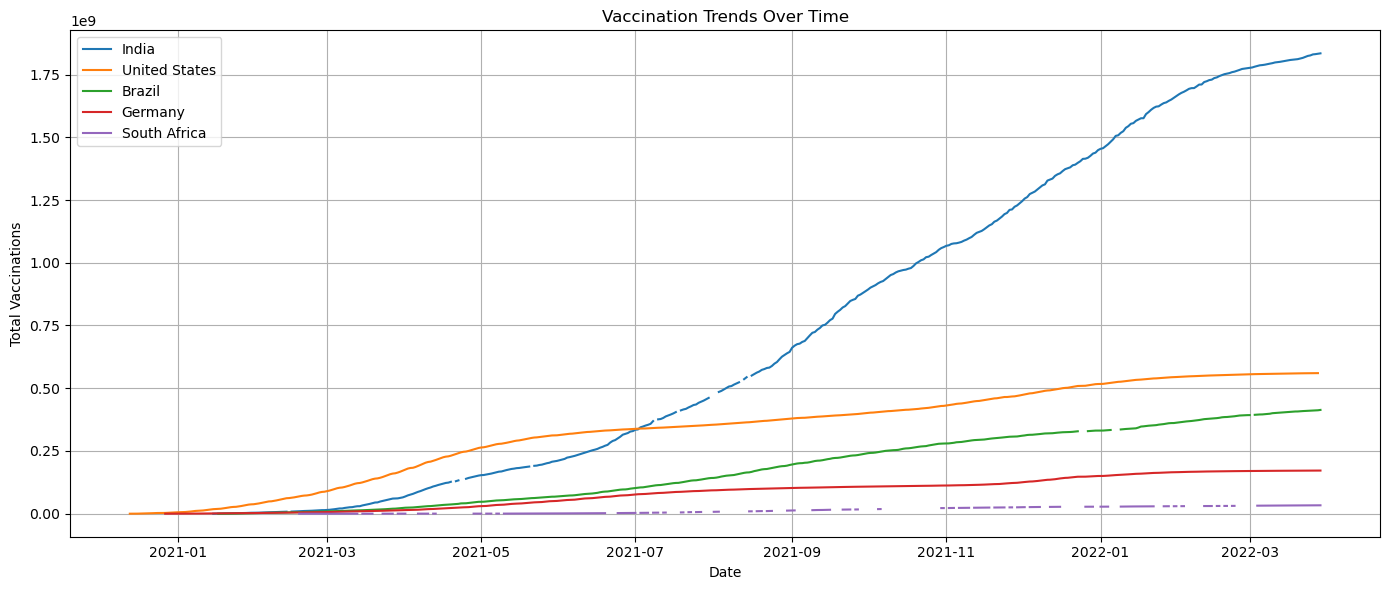

In [7]:
# Plot total vaccinations over time
plt.figure(figsize=(14, 6))
for country in countries:
    country_data = df_filtered[df_filtered['country'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Vaccination Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

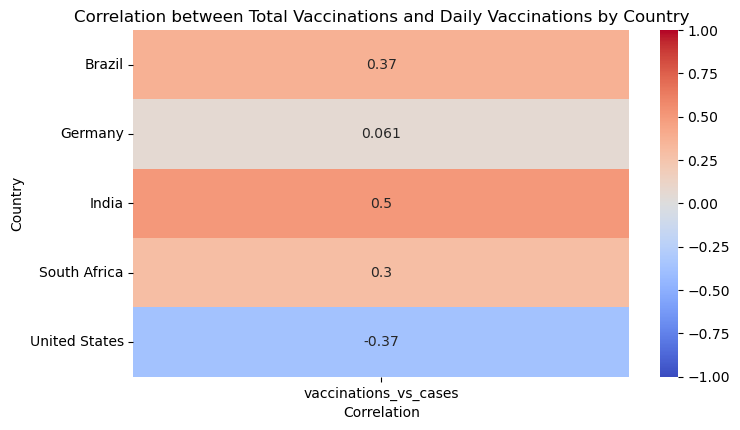

In [12]:
# Required columns
required_cols = ['country', 'total_vaccinations', 'daily_vaccinations']
existing_cols = [col for col in required_cols if col in df_filtered.columns]

# Filter and drop NA
df_corr = df_filtered[existing_cols].dropna()

# Calculate correlation per country and collect in dict
correlations = {}

for country in df_corr['country'].unique():
    country_df = df_corr[df_corr['country'] == country]
    if not country_df.empty:
        corr = country_df['total_vaccinations'].corr(country_df['daily_vaccinations'])
        correlations[country] = corr

# Convert to DataFrame for heatmap (countries as rows, one column)
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['vaccinations_vs_cases'])

# Plot heatmap
plt.figure(figsize=(8, len(corr_df) * 0.5 + 2))  # dynamic height based on number of countries
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Total Vaccinations and Daily Vaccinations by Country')
plt.xlabel('Correlation')
plt.ylabel('Country')
plt.show()